# Problem Statement


### Analyzing Hotel Booking Data to Improve Operational Efficiency and Customer Satisfaction


Hotel management requires a thorough understanding of booking trends, customer behaviors, and key factors influencing cancellations to optimize operations, enhance revenue, and improve customer satisfaction. The provided dataset contains various features related to hotel bookings, including booking details, customer demographics, and stay information. By leveraging this data, we aim to uncover actionable insights that can help hotel managers make informed decisions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('hotel_bookings.csv')

In [5]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [6]:
df.shape

(119390, 33)

In [7]:
df.duplicated().sum()


0

In [8]:
df.isnull().sum()

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [10]:
df.columns

Index(['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
df.drop(columns = ['agent','company'],inplace = True)
df.dropna(inplace = True)

In [12]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,59872.784496,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,34418.708956,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,30185.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,59930.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,89663.750000,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"]).dt.date

C:\Users\Guest User\AppData\Local\Temp\ipykernel_10664\2133789108.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"]).dt.date


In [14]:
df["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [15]:
df["arrival_date_month"] = pd.to_datetime(df["arrival_date_month"],format = "%B").dt.month

In [16]:
df["children"] = df["children"].astype(int)

In [17]:
## Assigning categories name to categorical integer columns.

df["is_canceled"] = df["is_canceled"].replace({0 : "Not Canceled", 1 : "Canceled"})
df["is_repeated_guest"]= df["is_repeated_guest"].replace({0 : "Not Repeated", 1 : "Repeated"})


In [18]:
month_mapping = { 1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August",
                  9 : "September", 10 : "October", 11 : "November", 12 : "December" }

# Convert the integer month column to month names using the mapping.

exit_month = pd.to_datetime(df["reservation_status_date"]).dt.month
df["exit_month_name"] = exit_month.map(month_mapping)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           118898 non-null  int64  
 1   hotel                           118898 non-null  object 
 2   is_canceled                     118898 non-null  object 
 3   lead_time                       118898 non-null  int64  
 4   arrival_date_year               118898 non-null  int64  
 5   arrival_date_month              118898 non-null  int32  
 6   arrival_date_week_number        118898 non-null  int64  
 7   arrival_date_day_of_month       118898 non-null  int64  
 8   stays_in_weekend_nights         118898 non-null  int64  
 9   stays_in_week_nights            118898 non-null  int64  
 10  adults                          118898 non-null  int64  
 11  children                        118898 non-null  int32  
 12  babies               

# Data Analysis and Visualization

# 1) What Is Distribution of Hotel Types ?

In [22]:
df["hotel"].value_counts()

hotel
City Hotel      79302
Resort Hotel    39596
Name: count, dtype: int64

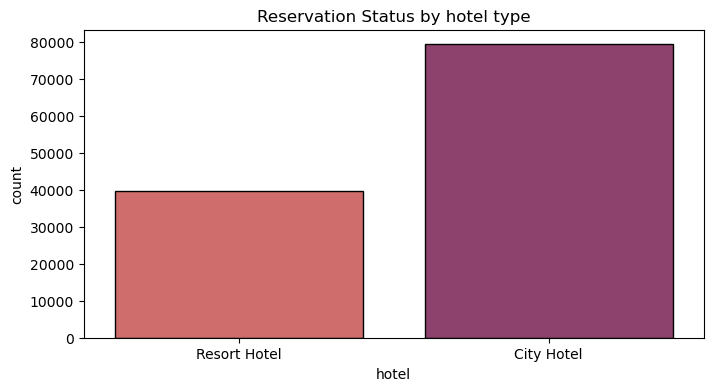

In [196]:
plt.figure(figsize = (8, 4))

ax = sns.countplot(data = df, x = "hotel", edgecolor = "k", palette = "flare")
plt.title("Reservation Status by hotel type")
# plt.xlabel("hotel")
plt.ylabel("count")
plt.show()


# 2)What proportion of bookings are canceled?

In [137]:
df['is_canceled'].value_counts(normalize = True)*100

is_canceled
Not Canceled    62.864808
Canceled        37.135192
Name: proportion, dtype: float64

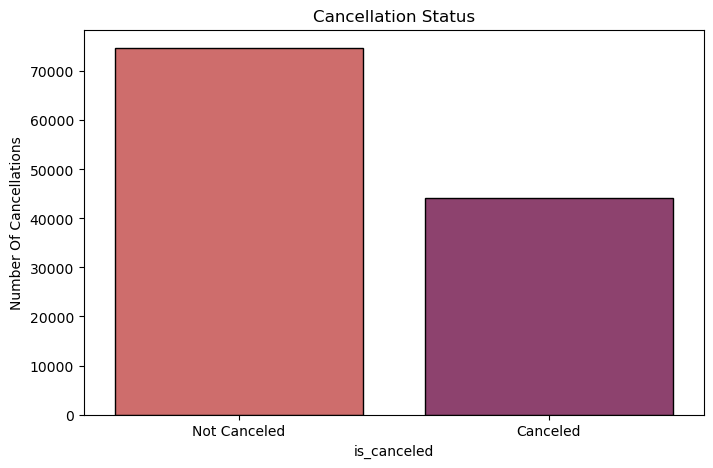

In [197]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x="is_canceled", edgecolor="k", palette="flare")
plt.title("Cancellation Status")
plt.ylabel("Number Of Cancellations")
plt.show()



# 3) Which months have the highest number of arrivals?

In [26]:
df["arrival_date_month"].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'June'),
  Text(4, 0, 'April'),
  Text(5, 0, 'May'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'November'),
  Text(9, 0, 'September'),
  Text(10, 0, 'December'),
  Text(11, 0, 'October')])

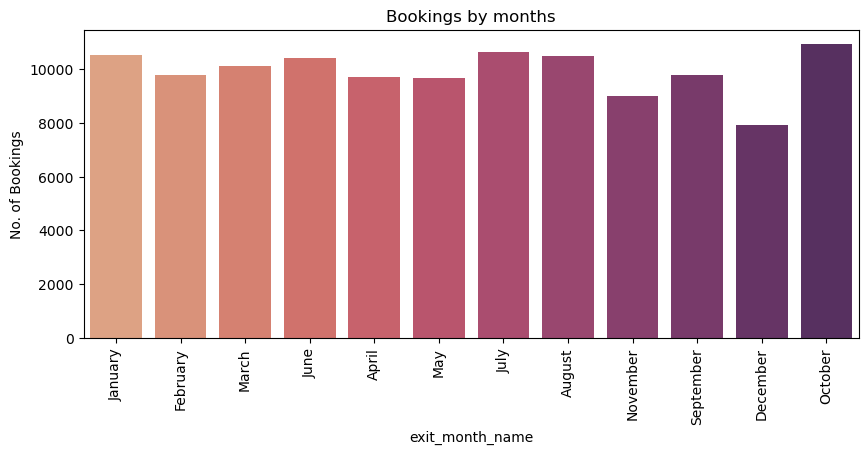

In [28]:
plt.figure(figsize = (10,4))
sns.countplot(data = df,x = "exit_month_name",palette="flare")
plt.ylabel("No. of Bookings")
plt.title("Bookings by months") 
plt.xticks(rotation = 90)

# 4) Which Year have the highest number of arrivals

In [32]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

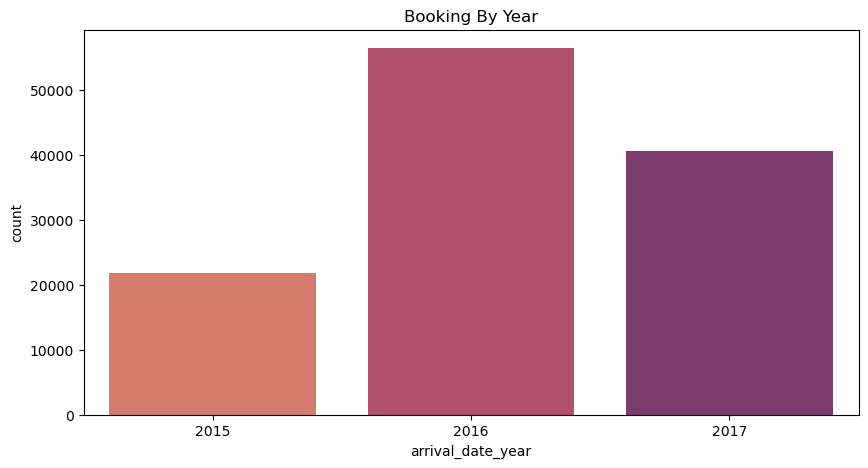

In [33]:
plt.figure(figsize = (10,5))

sns.countplot(data= df,x = "arrival_date_year",palette = "flare")
plt.title("Booking By Year")
plt.show()

# 5) What is the distribution of the number of weekend nights stayed?

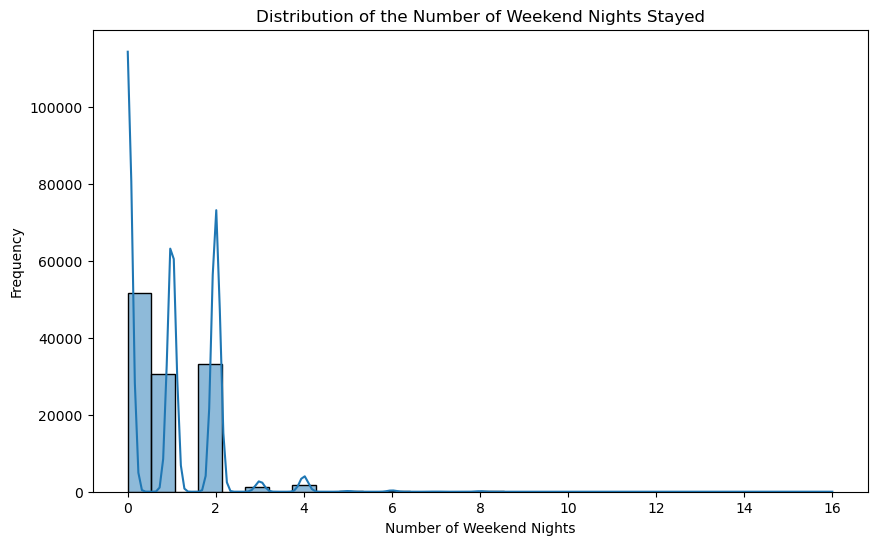

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stays_in_weekend_nights'], bins=30, kde=True)
plt.title('Distribution of the Number of Weekend Nights Stayed')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.show()

# 6) What is the distribution of the average daily rate (ADR)?

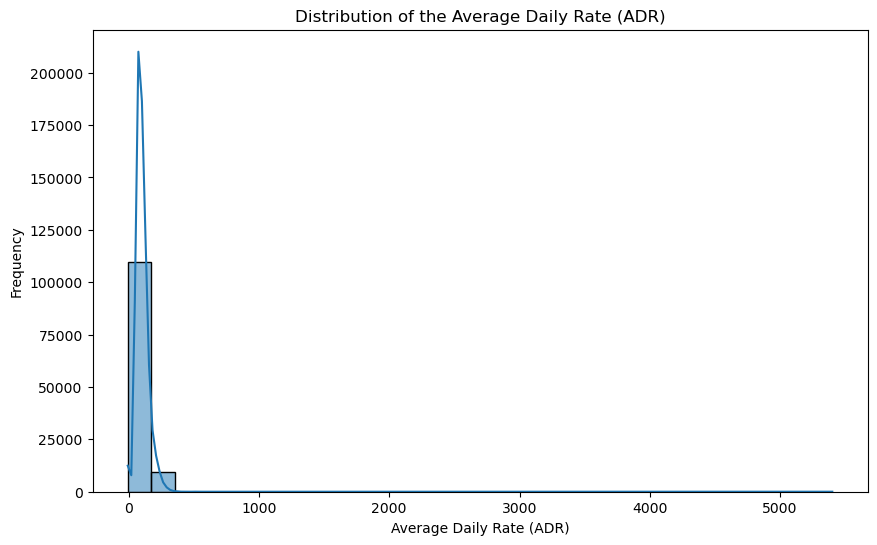

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=30, kde=True)
plt.title('Distribution of the Average Daily Rate (ADR)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')
plt.show()

# 7) What are the top 10 countries of origin for guests?

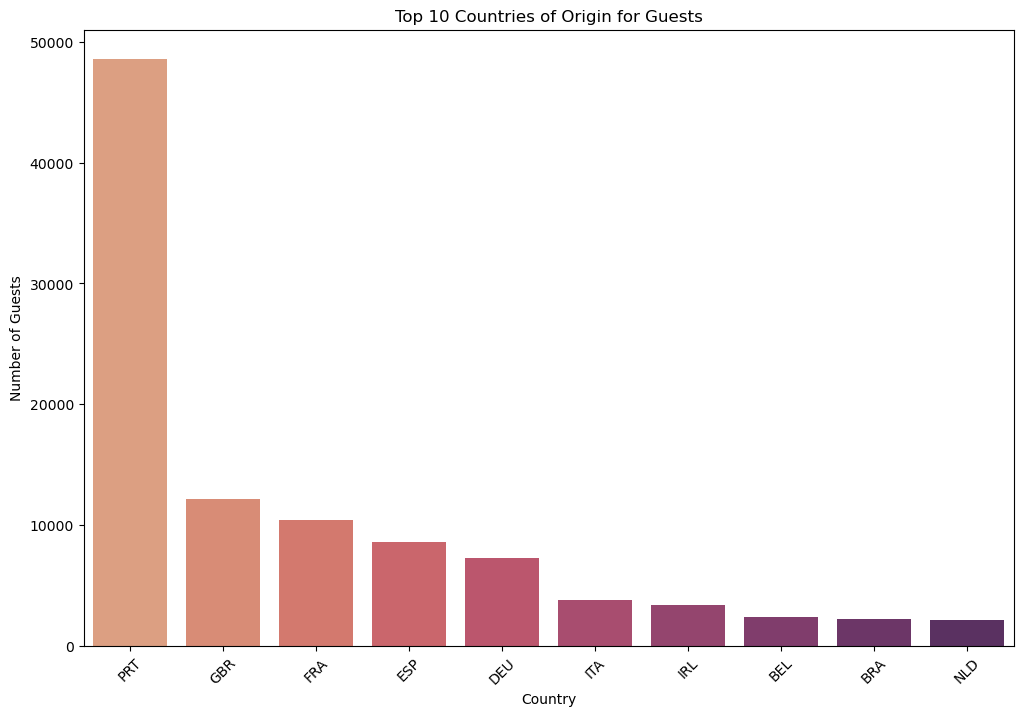

In [50]:
# Count the occurrences of each country
country_counts = df['country'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10)

# Plotting the bar chart for the top 10 countries of origin
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='flare')
plt.title('Top 10 Countries of Origin for Guests')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.show()

# 8) What is the distribution of market segments?

In [40]:
market_segment_counts = df["market_segment"].value_counts()
market_segment_counts

market_segment
Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

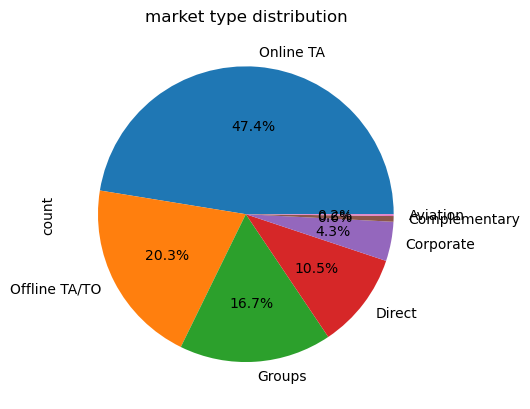

In [42]:
market_segment_counts.plot(kind = "pie",autopct = "%1.1f%%")
plt.title("market type distribution")
plt.show()

# 9) How does the number of reservations change over time for each reserved room type?

In [43]:
df["reserved_room_type"].value_counts()

reserved_room_type
A    85601
D    19173
E     6497
F     2890
G     2083
B     1114
C      931
H      601
L        6
P        2
Name: count, dtype: int64

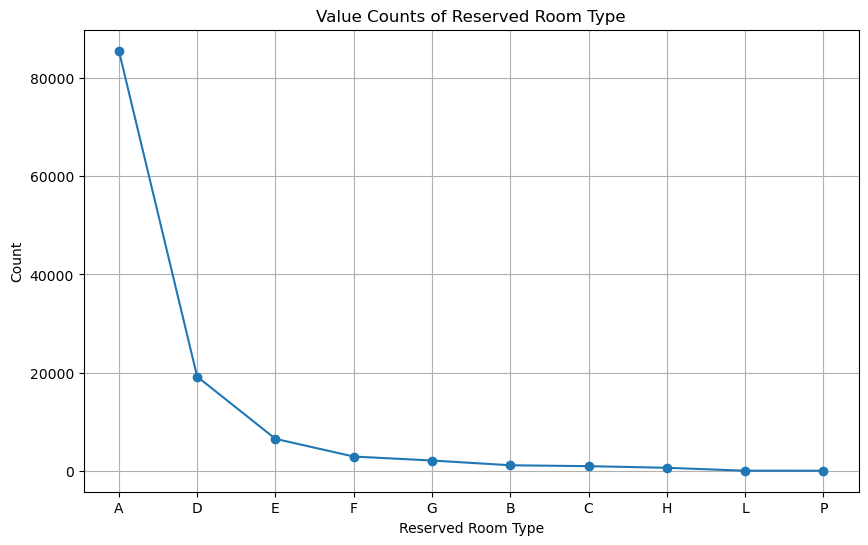

In [44]:
value_counts = df["reserved_room_type"].value_counts()

# Convert value_counts to a DataFrame for better handling
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['reserved_room_type', 'count']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(value_counts_df['reserved_room_type'], value_counts_df['count'], marker='o')
plt.title('Value Counts of Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 10) What is the distribution of customer types?

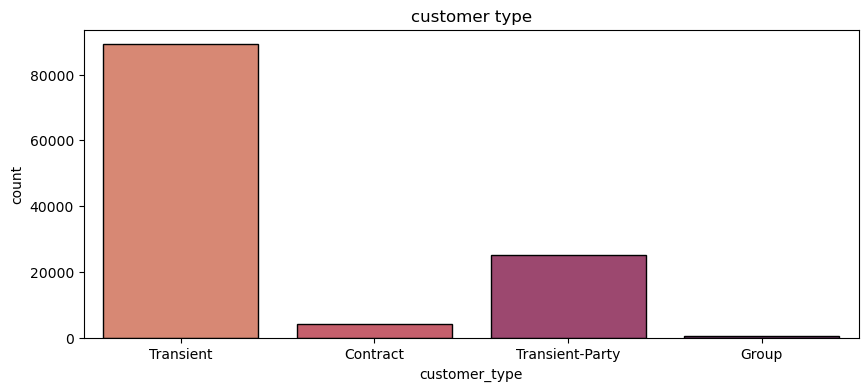

In [46]:
plt.figure(figsize = (10,4))
ax = sns.countplot(data = df,x = "customer_type",edgecolor = "k",palette = "flare")   
plt.title("customer type")
plt.ylabel("count")
plt.show()


# BI-VARIENT ANALYSIS 

# 11) What Is Cancellation Rate by each hotel type ?

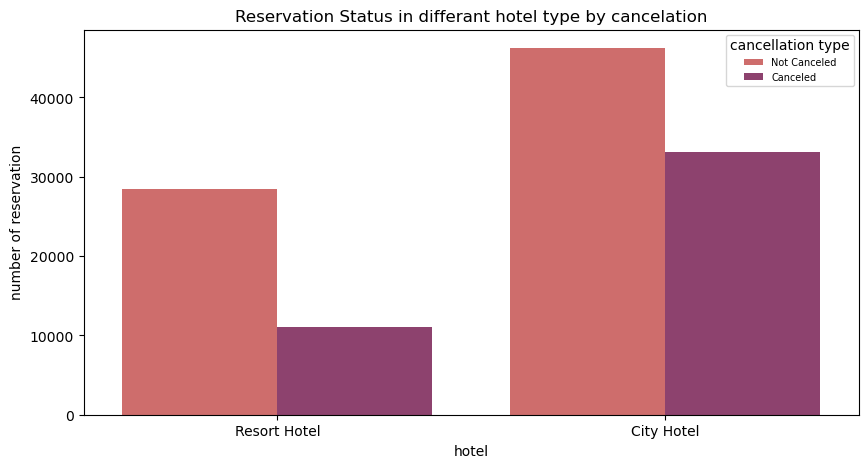

In [63]:
plt.figure(figsize = (10,5))
sns.countplot(data = df , x = 'hotel',hue = "is_canceled",palette = "flare" )
plt.title("Reservation Status in differant hotel type by cancelation")
plt.xlabel("hotel")
plt.ylabel("number of reservation")
plt.legend(title = "cancellation type",fontsize = 7)

## 12) What are the top 10 countries with the highest number of reservations, and what percentage of the total reservations do they collectively represent?

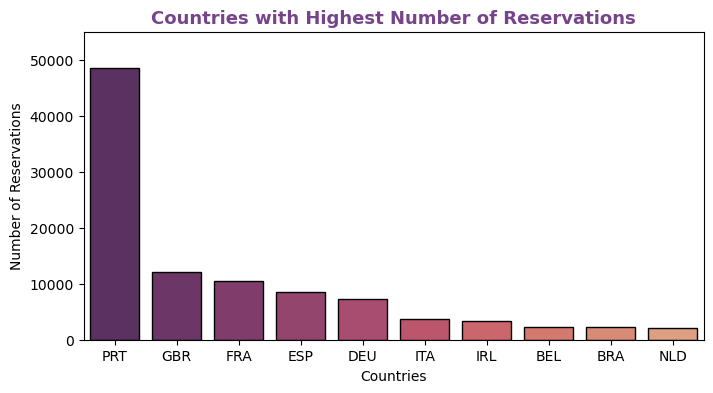

In [71]:
country_name = df["country"].value_counts().head(10).index
country_count = df["country"].value_counts().head(10).values

plt.figure(figsize = (8, 4))

ax = sns.barplot(data = df, x = country_name, y = country_count, edgecolor = "k", palette = "flare_r")
plt.title("Countries with Highest Number of Reservations", size = 13, weight = "bold", color = "#76448A")
plt.xlabel("Countries")
plt.ylabel("Number of Reservations")
plt.ylim([0, 55000])

plt.show()

# 13) What is the relationship between the number of adults and the average daily rate (ADR)?

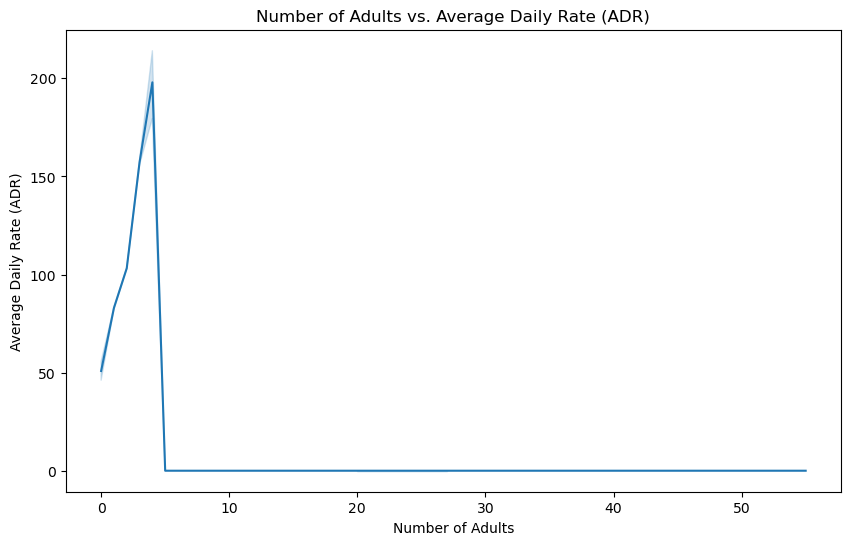

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='adults', y='adr', data=df)
plt.title('Number of Adults vs. Average Daily Rate (ADR)')
plt.xlabel('Number of Adults')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# 14) How does the number of special requests affect the cancellation rate?

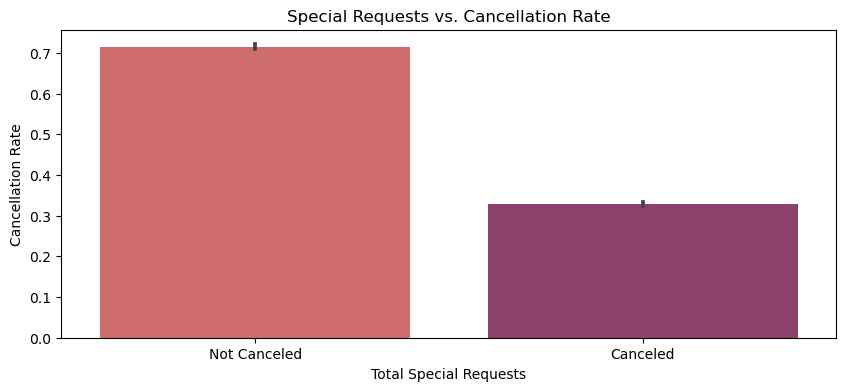

In [83]:
plt.figure(figsize=(10, 4))
sns.barplot(y='total_of_special_requests', x='is_canceled', data=df,palette = 'flare')
plt.title('Special Requests vs. Cancellation Rate')
plt.xlabel('Total Special Requests')
plt.ylabel('Cancellation Rate')
plt.show()

# 15)How does the length of stay (weekend nights vs. weeknights) differ between hotel types?

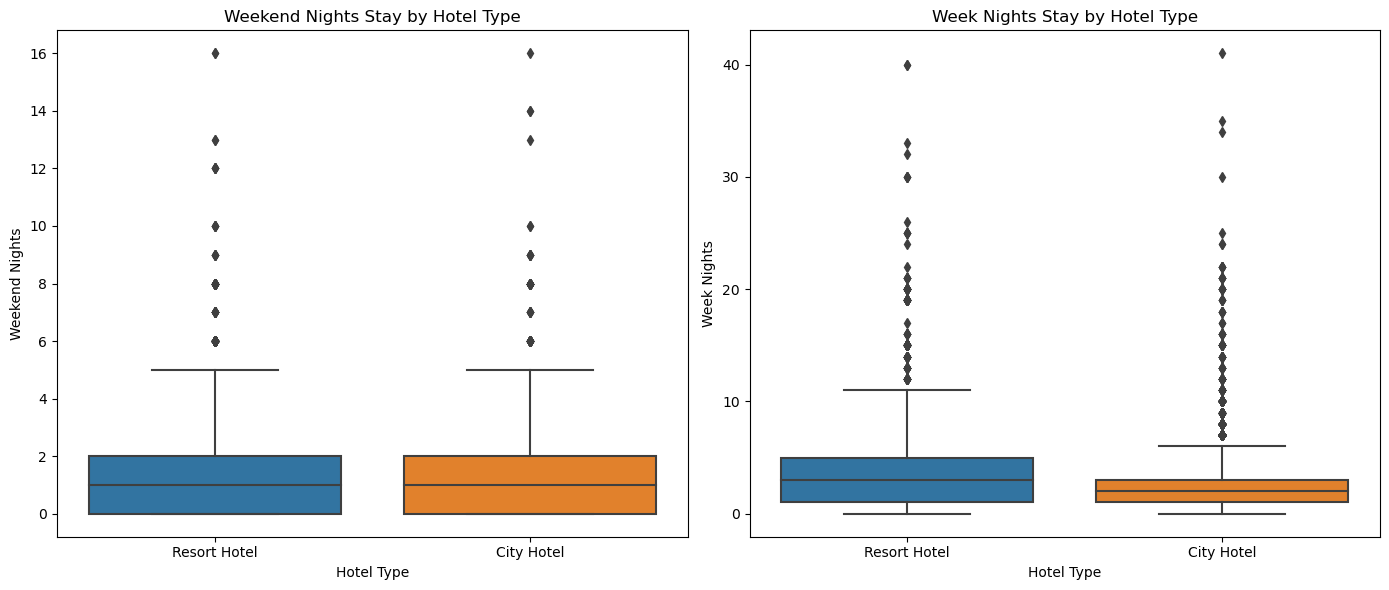

In [103]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='hotel', y='stays_in_weekend_nights', data=df)
plt.title('Weekend Nights Stay by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Weekend Nights')

plt.subplot(1, 2, 2)
sns.boxplot(x='hotel', y='stays_in_week_nights', data=df)
plt.title('Week Nights Stay by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Week Nights')

plt.tight_layout()
plt.show()

# 16) What is the relationship between market segment and lead time?

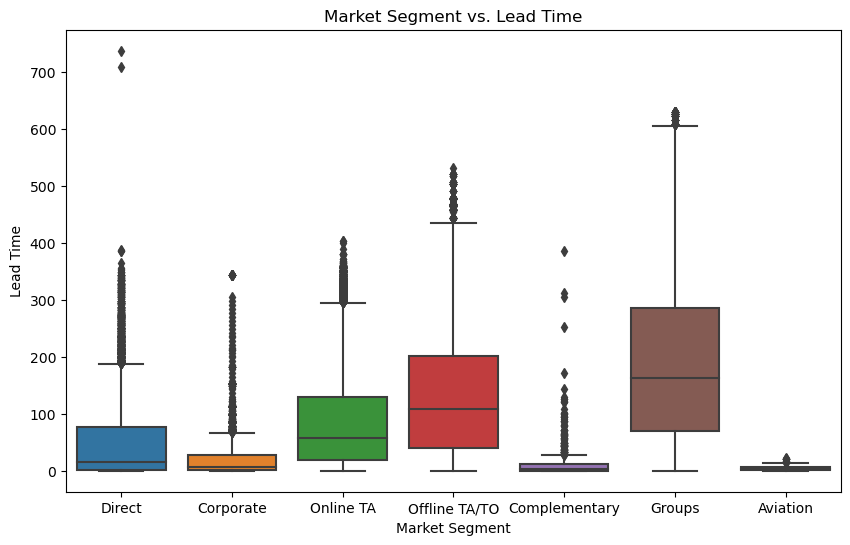

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='market_segment', y='lead_time', data=df)
plt.title('Market Segment vs. Lead Time')
plt.xlabel('Market Segment')
plt.ylabel('Lead Time')
plt.show()

# 17)  How does the average daily rate (ADR) vary by country of origin?

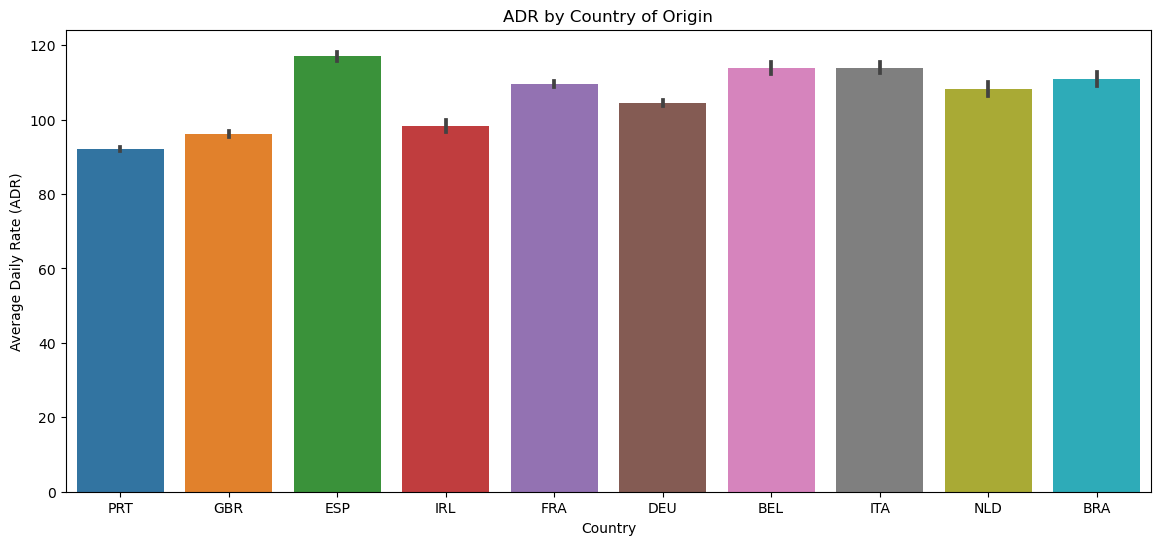

In [107]:
plt.figure(figsize=(14, 6))
top_countries = df['country'].value_counts().index[:10]
sns.barplot(x='country', y='adr', data=df[df['country'].isin(top_countries)])
plt.title('ADR by Country of Origin')
plt.xlabel('Country')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# 18) How does the number of days in the waiting list affect the cancellation rate?

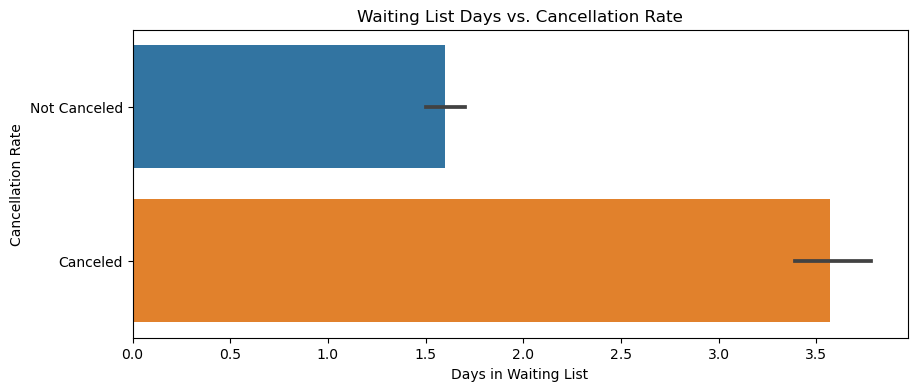

In [111]:
plt.figure(figsize=(10, 4))
sns.barplot(x='days_in_waiting_list', y='is_canceled', data=df)
plt.title('Waiting List Days vs. Cancellation Rate')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation Rate')
plt.show()

# 19) Which market segments contribute the most to hotel bookings, and how do they differ in terms of Hotel Type?

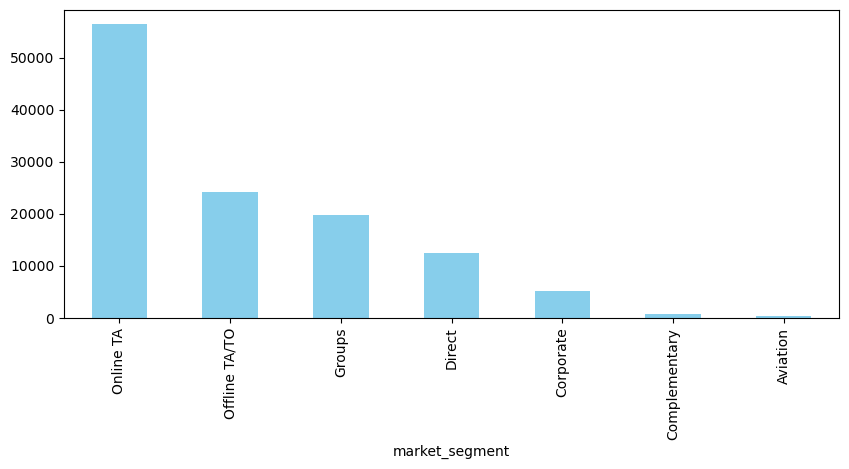

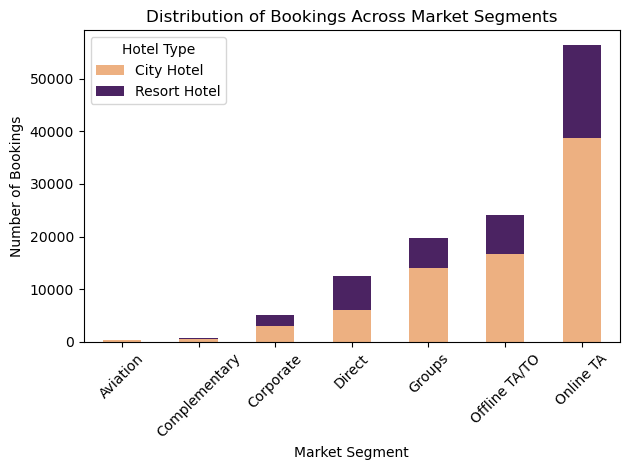

In [116]:
segment_counts = df['market_segment'].value_counts()

# Calculate the distribution of bookings across market segments for each hotel type
segment_hotel_counts = df.groupby(['market_segment', 'hotel']).size().unstack()

# Plotting
plt.figure(figsize=(10, 4))

# Stacked bar plot for the distribution of bookings across market segments
segment_counts.plot(kind='bar', color='skyblue', label='Total Bookings')

# Stacked bar plot for the distribution of bookings across market segments for each hotel type
segment_hotel_counts.plot(kind='bar', stacked=True, colormap='flare')

plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Bookings Across Market Segments')
plt.legend(title='Hotel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 20)  Room Preferences: What are the most commonly reserved and assigned room types? Are there discrepancies between reserved and assigned room types?

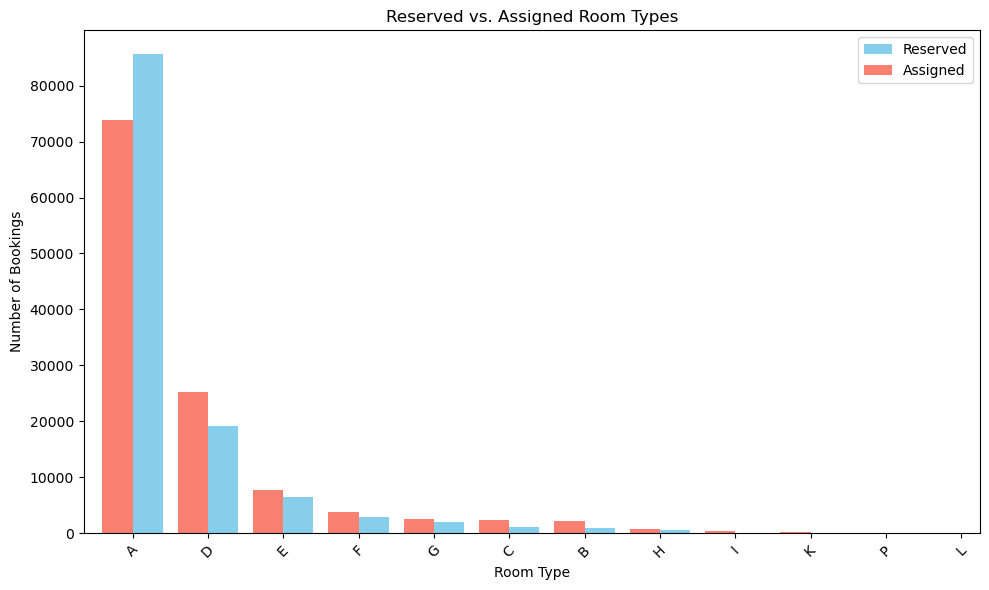

In [117]:
reserved_room_counts = df['reserved_room_type'].value_counts()

# Calculate the counts of assigned room types
assigned_room_counts = df['assigned_room_type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))

# Grouped bar plot for reserved and assigned room types
reserved_room_counts.plot(kind='bar', color='skyblue', position=0, width=0.4, label='Reserved')
assigned_room_counts.plot(kind='bar', color='salmon', position=1, width=0.4, label='Assigned')

plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.title('Reserved vs. Assigned Room Types')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 21) Market segment and distribution channel effect on ADR ?

C:\Users\Guest User\AppData\Local\Temp\ipykernel_10664\1274227709.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='market_segment', y='adr', hue='distribution_channel', data=data_filtered, ci=None, palette='viridis')


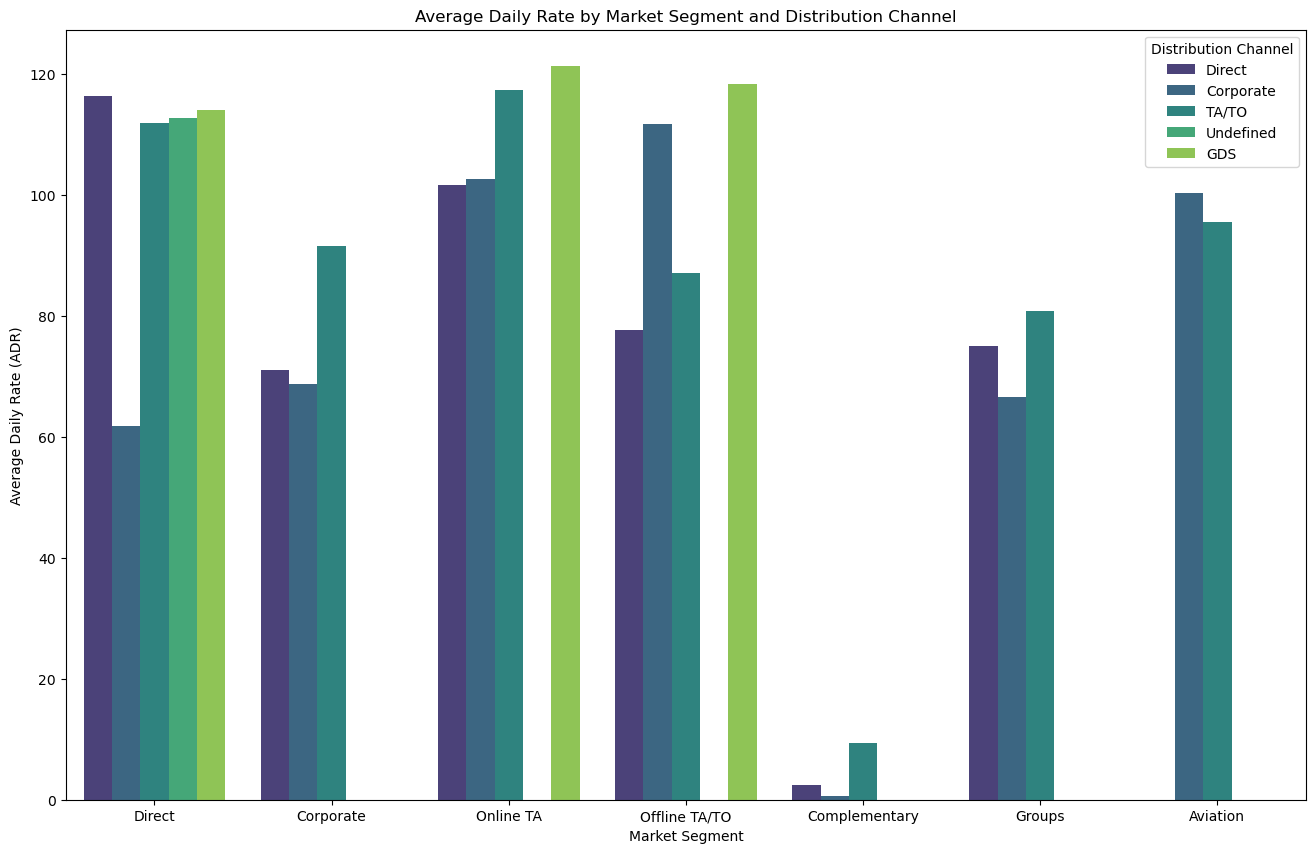

In [145]:
data_filtered = df[['market_segment', 'distribution_channel', 'adr']]
plt.figure(figsize=(16, 10))
sns.barplot(x='market_segment', y='adr', hue='distribution_channel', data=data_filtered, ci=None, palette='viridis')
plt.title('Average Daily Rate by Market Segment and Distribution Channel')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Distribution Channel')
plt.show()

# 22) How does the reservation cancellation rate vary across different months?

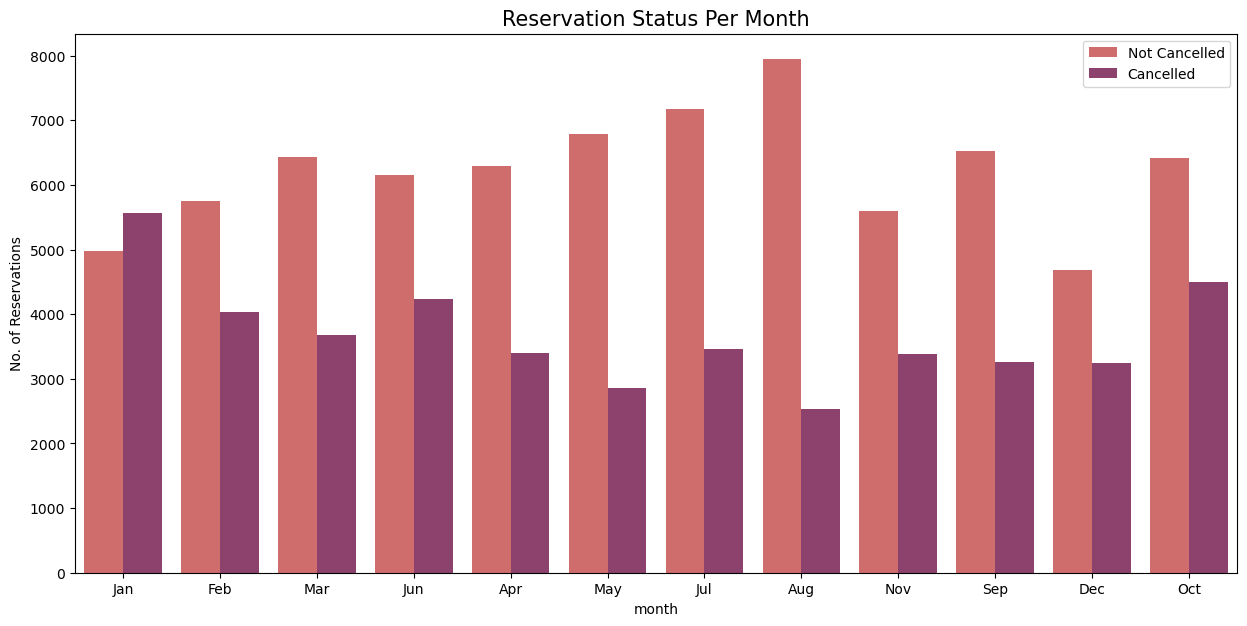

In [173]:
plt.figure(figsize = (15,7))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'flare')
ax1.legend(loc = 'best')
plt.title('Reservation Status Per Month', fontsize = 15)
plt.ylabel('No. of Reservations')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()
     


# 23) How does the average daily rate (ADR) change over time for Resort Hotels compared to City Hotels ?

In [176]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True) 

          

is_canceled
Not Canceled    0.72025
Canceled        0.27975
Name: proportion, dtype: float64

In [177]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)
     


is_canceled
Not Canceled    0.582911
Canceled        0.417089
Name: proportion, dtype: float64

In [178]:
resort_hotel = resort_hotel.groupby('reservation_status_date')['adr'].mean().reset_index()
city_hotel = city_hotel.groupby('reservation_status_date')['adr'].mean().reset_index()
     

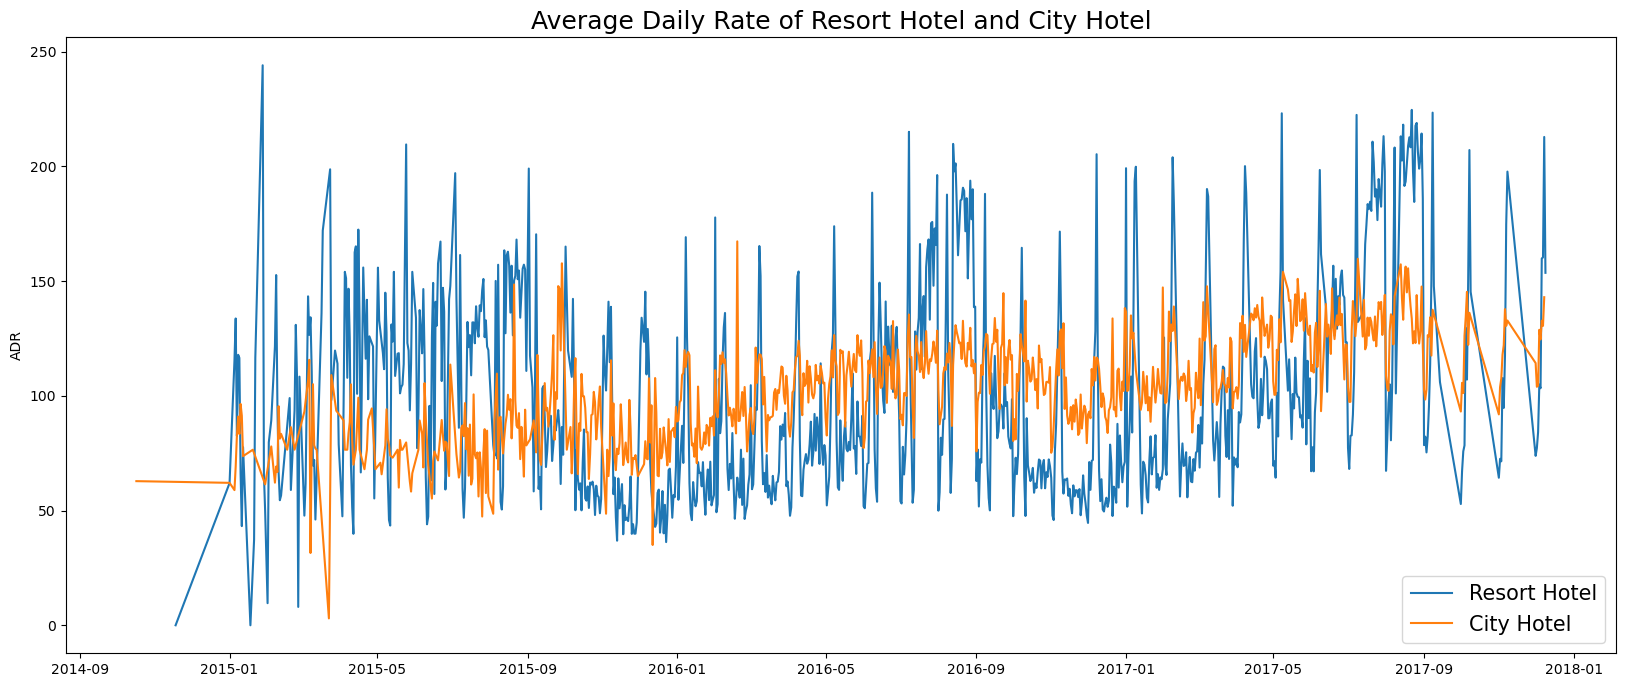

In [179]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate of Resort Hotel and City Hotel', fontsize = 18)
plt.plot(resort_hotel['reservation_status_date'], resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel['reservation_status_date'], city_hotel['adr'], label = 'City Hotel')
plt.ylabel('ADR')
plt.legend(fontsize = 15)
plt.show()

# 24) What is the relationship between lead time, days in the waiting list, and cancellations?

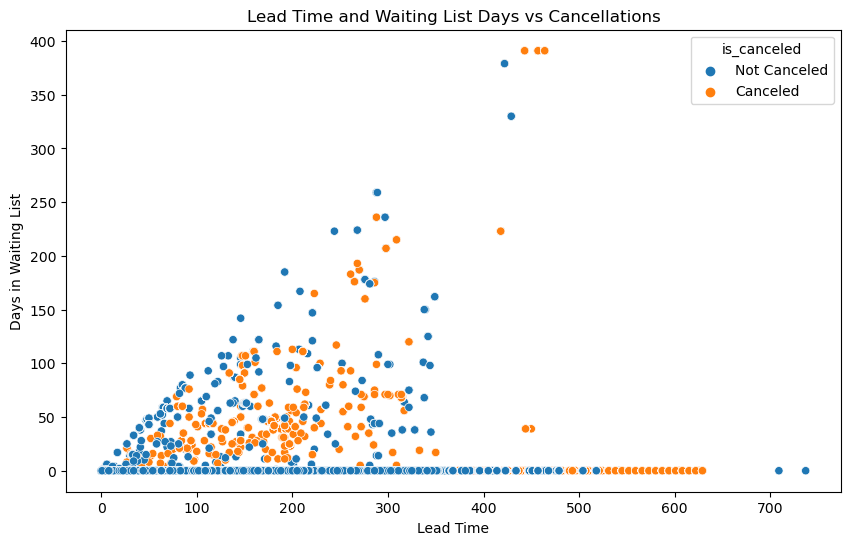

In [187]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lead_time', y='days_in_waiting_list', hue='is_canceled')
plt.title('Lead Time and Waiting List Days vs Cancellations')
plt.xlabel('Lead Time')
plt.ylabel('Days in Waiting List')
plt.show()

# 25) What is the distribution of average daily rate (ADR) across different customer types and market segments?

C:\Users\Guest User\AppData\Local\Temp\ipykernel_10664\1946953704.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='customer_type', y='adr', hue='market_segment',ci=None)


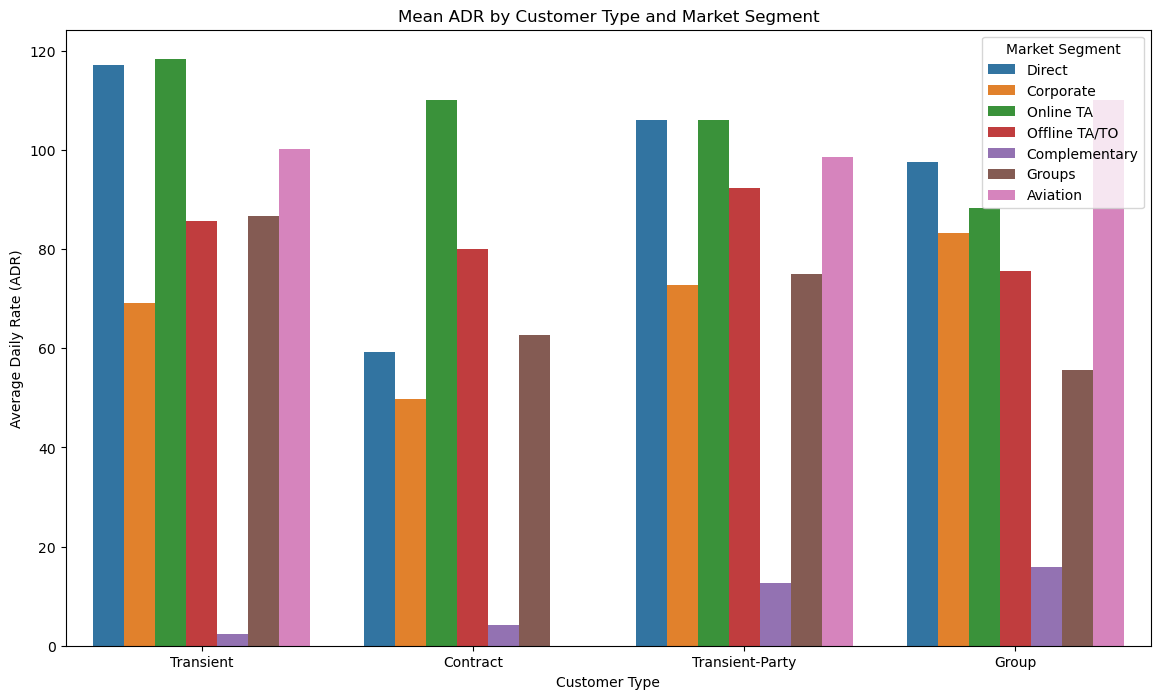

In [195]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='customer_type', y='adr', hue='market_segment',ci=None)
plt.title('Mean ADR by Customer Type and Market Segment')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Market Segment', loc='upper right')
plt.show()

# CONCLUSIONS


### 1) Reservation Status by Hotel Type:
### City hotels have a higher number of reservations compared to resort hotels, indicating a greater demand for urban accommodations among travelers.
### 
### 2) Cancellation Status:
### A significant number of reservations are not canceled, with approximately 45,000 cancellations observed, suggesting a stable booking pattern overall.
### 
### 3) Monthly Arrivals:
### October, July, and August have the highest number of arrivals, highlighting the peak travel seasons.
### The year 2016 experienced the most bookings, reflecting a possible trend or event driving higher travel activity during that year.
### 
### 4) Country of Origin:
### The United Kingdom and France have the highest number of guests, indicating strong outbound travel markets from these countries.
### 
### 5) Market Segment Distribution:
### Online TA (Travel Agencies) and offline TA/TO (Travel Operators) cover 67% of the market, showing a significant reliance on these booking channels.
### Room types A, D, and E are the most commonly reserved, suggesting these room categories are preferred by the majority of guests.
### 6) Cancellation Rate by Hotel Type:
### City hotels have a higher cancellation rate compared to resort hotels, possibly due to more flexible travel plans or business-related bookings in urban areas.
### 
### 7) Impact of Special Requests on Cancellations:
### Customers with special requests are less likely to cancel their bookings, indicating that personalized services may enhance booking commitment.
### 
### 8) Average Daily Rate (ADR) by Country:
### ADR is significantly impacted for Spain (ESP), which could be due to various factors such as local events, economic conditions, or travel policies affecting pricing.
### 
### 9) Market Segment Distribution in City vs. Resort Hotels:
### Online TA and offline TA/TO dominate the market segment for city hotels compared to resort hotels, showing a distinct preference in booking channels between urban and leisure destinations.
### 
### 10) Reserved vs. Assigned Room Types:
### Room types A, D, and E dominate both reserved and assigned room types, indicating a high demand and preference consistency for these room categories.
### 
### 11) ADR by Market Segment:
### Direct bookings and corporate sectors significantly impact the ADR in the market segment, suggesting that these channels can command higher room rates.
### 
### 12) Monthly Cancellation Trends:
### January sees the highest number of cancellations, which could be due to post-holiday season changes in travel plans or unfavorable weather conditions affecting travel.
### 
### 13) ADR Trends by Hotel Type:
### Resort hotels show frequent changes in ADR, whereas city hotels maintain a more stable ADR over time, reflecting different pricing strategies and market dynamics in urban versus leisure destinations.
### 
### 14) Customer Type and Market Segment:
### In the transient segment, direct bookings and online TA have the highest prevalence, with fewer complimentary bookings, indicating that most transient travelers prefer flexible and convenient booking methods.
### In the contract segment, online TA and offline TA/TO are predominant, showing a strong reliance on travel agencies and operators for contract bookings.